#   Question 1 

#   KNN Glass data 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [34]:
glass_data = pd.read_csv("glass.csv")
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


###   Preprocessing the dataset

In [35]:
glass_data[glass_data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [36]:
glass = glass_data.drop_duplicates().reset_index(drop=True)
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


###  Splitting the dataset

In [37]:
x = glass.iloc[:,0:9]
y = glass.iloc[:,9]

In [38]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size= 0.25, random_state=0)

###  Standardizing the train and test variable 

In [39]:
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

###  Building the KNN Model 

In [40]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

###   Predict the KNN Model

In [41]:
y_pred = model.predict(x_test)
y_pred

array([7, 1, 1, 5, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 7, 1, 1, 1, 2, 7, 7,
       7, 7, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 7, 2, 2, 2, 1,
       1, 2, 1, 2, 1, 1, 1, 5, 7, 1], dtype=int64)

###   Evaluate the Model 

<AxesSubplot:>

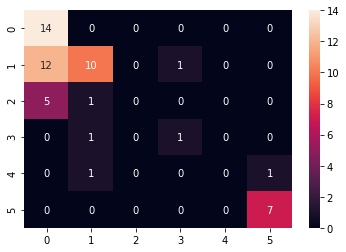

In [42]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

In [43]:
accuracy_score(y_test,y_pred)

0.5925925925925926

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.45      1.00      0.62        14
           2       0.77      0.43      0.56        23
           3       0.00      0.00      0.00         6
           5       0.50      0.50      0.50         2
           6       0.00      0.00      0.00         2
           7       0.88      1.00      0.93         7

    accuracy                           0.59        54
   macro avg       0.43      0.49      0.44        54
weighted avg       0.58      0.59      0.54        54



E:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


E:\ProgramData\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\ProgramData\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


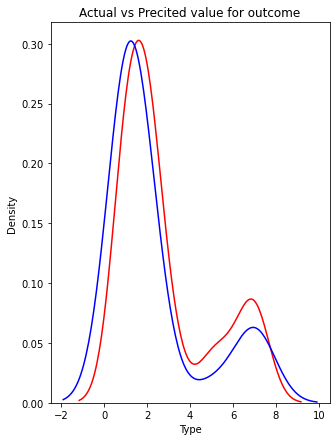

In [45]:
plt.figure(figsize=(5, 7))
ax = sns.distplot(glass['Type'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

###  Finding the best value for n_neighbours 

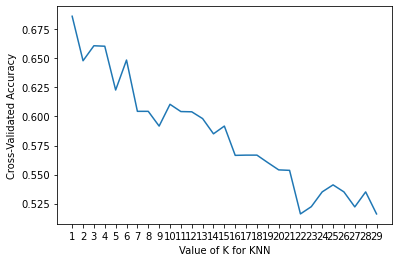

In [46]:
k_range = range(1, 30)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5)
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xticks(k_range)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

###  Building the KNN Model for k=1 from the above graph 

In [47]:
model_1 = KNeighborsClassifier(n_neighbors=1)
model_1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

###  Predict the KNN Model

In [48]:
y_pred_1 = model_1.predict(x_test)
y_pred_1

array([7, 1, 2, 5, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 7, 2, 1, 3, 1, 6, 7,
       7, 7, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 7, 2, 7, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 6, 7, 1], dtype=int64)

###  Evaluate the Model 

<AxesSubplot:>

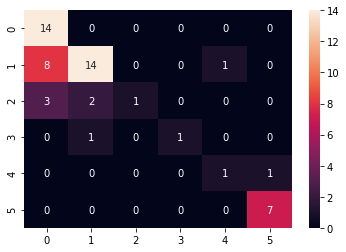

In [49]:
sns.heatmap(confusion_matrix(y_test,y_pred_1),annot=True)

In [50]:
accuracy_score(y_test,y_pred_1)

0.7037037037037037

In [51]:
print(classification_report(y_test,y_pred_1))

              precision    recall  f1-score   support

           1       0.56      1.00      0.72        14
           2       0.82      0.61      0.70        23
           3       1.00      0.17      0.29         6
           5       1.00      0.50      0.67         2
           6       0.50      0.50      0.50         2
           7       0.88      1.00      0.93         7

    accuracy                           0.70        54
   macro avg       0.79      0.63      0.63        54
weighted avg       0.78      0.70      0.68        54



E:\ProgramData\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\ProgramData\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


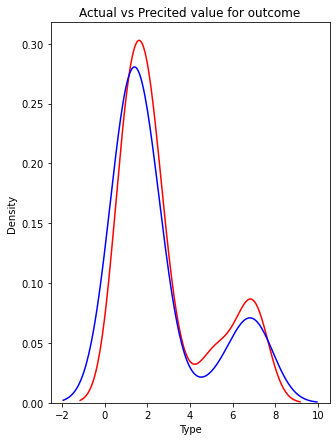

In [52]:
plt.figure(figsize=(5, 7))
ax = sns.distplot(glass['Type'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_1, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

###   Evaluating the above two KNN model, a KNN classifier with number of neighbors as 1 achieves the best score/accuracy of 70%